In [1]:
%matplotlib inline
import numpy as np
import PP as pp
import matplotlib.pyplot as plt

### Defining agents:

In [2]:
ag1 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.85,0.15],[0.45,0.55]]))
ag1.evaluate_post()

In [3]:
ag2 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.85,0.15],[0.45,0.55]]))
ag2.evaluate_post()

### Simulation:

In [4]:
def simulate_pp(n, ag1, ag2, truth_1, truth_2):
    payoff_1 = 0
    
    for i in range(n):
        u = np.random.uniform()
        rep_1 = ag1.report(u,truth_1)
        rep_2 = ag2.report(u,truth_2)

        payoff_1 += pp.logarithmic(ag1, rep_1, ag2, rep_2)
        
    return payoff_1

In [5]:
truthful = [simulate_pp(1000, ag1, ag2, True, True) for i in range(1000)]

In [6]:
liar = [simulate_pp(1000, ag1, ag2, False, True) for i in range(1000)]

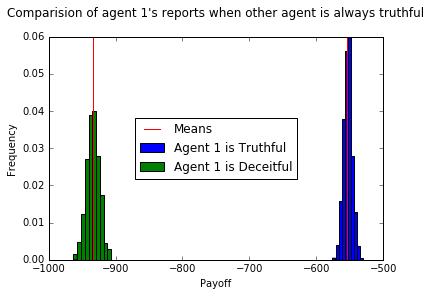

In [28]:
plt.hist(truthful, normed = True, label = 'Agent 1 is Truthful')
plt.hist(liar, normed = True, label = 'Agent 1 is Deceitful')
plt.axvline(np.mean(truthful), color = 'red',label = 'Means')
plt.axvline(np.mean(liar), color = 'red')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.legend(loc = 10)
plt.title("Comparision of agent 1's reports when other agent is always truthful\n")
plt.show()